In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
dataset = pd.read_excel('train.xlsx')

In [3]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dataset.shape

(10683, 11)

## EDA

In [5]:
cat_feat = [i for i in dataset.columns if dataset[i].dtype=='O']

In [6]:
for i in cat_feat:
    print(i, len(dataset[i].unique()))

Airline 12
Date_of_Journey 44
Source 5
Destination 6
Route 129
Dep_Time 222
Arrival_Time 1343
Duration 368
Total_Stops 6
Additional_Info 10


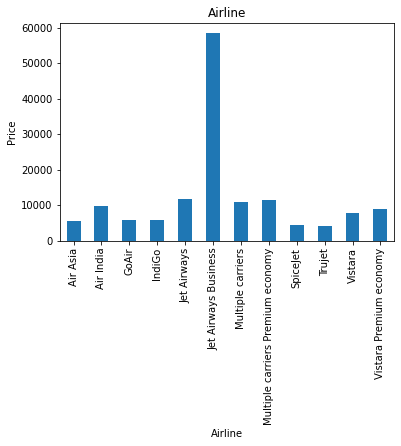

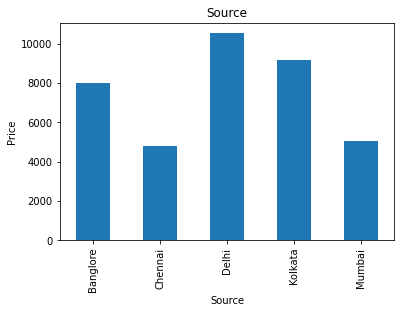

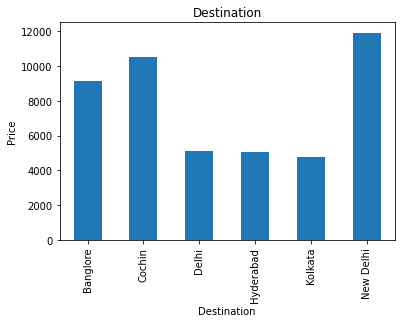

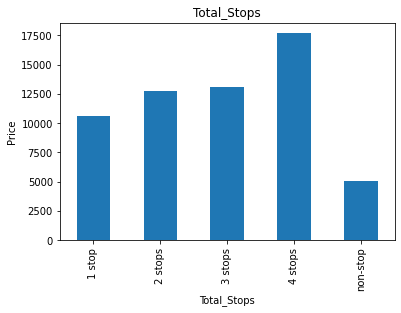

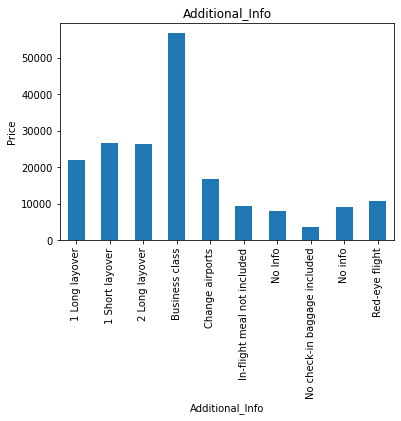

In [7]:
for i in cat_feat:
    if len(dataset[i].unique())>20:
        continue
    dataset.groupby(i)['Price'].mean().plot.bar()
    plt.title(i)
    plt.ylabel('Price')
    plt.show()

In [8]:
for i in cat_feat:
    print()
    if len(dataset[i].unique())>20:
        continue
    print(dataset.groupby(i)['Price'].mean())


Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64


Source
Banglore     8017.464269
Chennai      4789.892388
Delhi       10539.439057
Kolkata      9158.389411
Mumbai       5059.708752
Name: Price, dtype: float64

Destination
Banglore      9158.389411
Cochin       10539.439057
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
New Delhi    11917.716738
Name: Price, dtype: float64






In [9]:
dataset.loc[dataset.Destination=='New Delhi', 'Destination'] = 'Delhi'

C:\Users\shash\Anaconda3\envs\flight\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

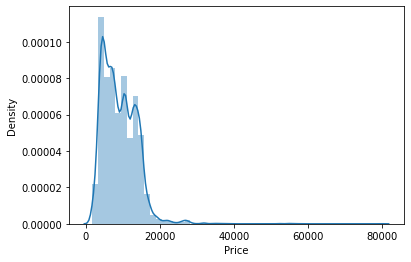

In [10]:
sns.distplot(dataset.Price)

C:\Users\shash\Anaconda3\envs\flight\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

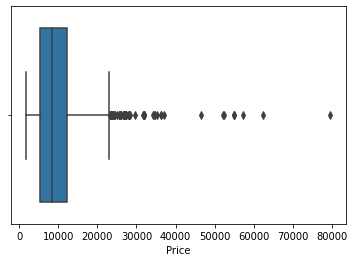

In [11]:
sns.boxplot(dataset.Price)

In [12]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering

In [13]:
data = dataset.copy(deep=True)

In [14]:
data.shape

(10683, 11)

In [15]:
# test = pd.read_excel('test.xlsx')
# test_pred = pd.read_excel('test_pred.xlsx')
# test = pd.concat([test, test_pred], axis=1)
# data = pd.concat([test, data])

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
data.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [18]:
data['Journey_Day'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month
data.dropna(axis=0, inplace=True)
Source = data[['Source']]
Source = pd.get_dummies(Source, drop_first= True)
Destination = data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first= True)
data = pd.concat([data, Source, Destination], axis=1)
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(["Arrival_Time"], axis = 1, inplace = True)

hr = []
for i in data.Duration.values:
    duration = i.split(' ')
    if len(duration)==2:
        hr.append(float(duration[0][:-1])+(float(duration[1][:-1])/60))
    else:
        hr.append(float(duration[0][:-1]))
        
data['Duration'] = hr
s = []    
for i in data.Total_Stops.values:
    stops = 0
    total_stops = i.split(' ')
    if len(total_stops)==2:
        stops = int(total_stops[0])
    else:
        stops = 0
    s.append(stops)

data.Total_Stops = s
data.Additional_Info = np.where(data.Additional_Info=='No Info','No info',data.Additional_Info)
data[pd.get_dummies(data['Airline'], drop_first=True).columns] = pd.get_dummies(data['Airline'], drop_first=True)
data[pd.get_dummies(data['Additional_Info'], drop_first=True).columns] = pd.get_dummies(data['Additional_Info'], drop_first=True)
data.drop(['Airline','Additional_Info','Date_of_Journey','Source','Destination','Route'], axis=1, inplace=True)


In [19]:
X = [i for i in data.columns if i not in 'Price']
y = 'Price'

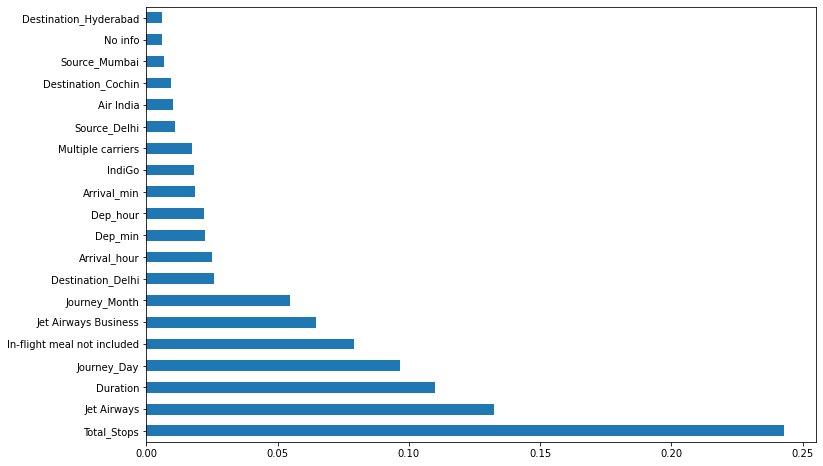

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(data[X], data[y])
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=data[X].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [21]:
data.head()

,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,No info,Red-eye flight
0,2.833333,0,3897,24,3,0,0,0,0,0,1,0,0,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.416667,2,7662,1,5,0,0,1,0,0,0,0,0,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,19.000000,2,13882,9,6,0,1,0,0,1,0,0,0,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5.416667,1,6218,12,5,0,0,1,0,0,0,0,0,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.750000,1,13302,1,3,0,0,0,0,0,1,0,0,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
dataset.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [43]:
data.sample(1).shape

(1, 36)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.3, random_state=42)

In [46]:
X_train.sample(random_state=1).values

array([[ 3.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  7.,
        10., 10., 10.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [25]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
pred = model.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.9031549377170479

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 770.0633469889577
MSE: 1975729.0052044285
RMSE: 1405.6062767377032


C:\Users\shash\Anaconda3\envs\flight\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

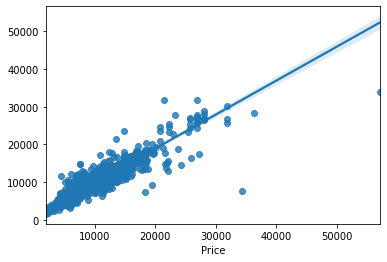

In [30]:
sns.regplot(y_test, pred)

In [31]:
metrics.r2_score(y_test, pred)

0.9031549377170479

In [32]:
data.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Red-eye flight'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

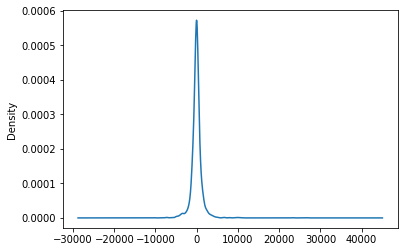

In [33]:
pd.Series(y_test-pred).plot.kde()

In [ ]:
import optuna

In [61]:
def objective(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    eta = trial.suggest_float('eta', 0.1, 1)
    gamma = trial.suggest_float('gamma', 0.1, 1)
    max_depth = trial.suggest_int('max_depth', 0, 32)
    model = XGBRegressor(predictor='gpu_predictor',eta=eta,gamma=gamma,max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    error = metrics.mean_squared_error(y_test, y_pred)

    return error  # An objective value linked with the Trial object.

In [60]:
study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=500)

[I 2021-01-25 12:10:05,547] A new study created in memory with name: no-name-2e2fb6b7-c887-4559-b6ab-848b9b34fec9
[I 2021-01-25 12:10:16,880] Trial 0 finished with value: 2111101.8519103373 and parameters: {'eta': 0.36305196935035033, 'gamma': 0.6810445101333831, 'max_depth': 30}. Best is trial 0 with value: 2111101.8519103373.
[I 2021-01-25 12:10:21,113] Trial 1 finished with value: 2522461.8069605567 and parameters: {'eta': 0.45585806231356507, 'gamma': 0.5644604320649522, 'max_depth': 15}. Best is trial 0 with value: 2111101.8519103373.
[I 2021-01-25 12:10:25,978] Trial 2 finished with value: 2251772.375458706 and parameters: {'eta': 0.37290751226926944, 'gamma': 0.9893796912024472, 'max_depth': 16}. Best is trial 0 with value: 2111101.8519103373.
[I 2021-01-25 12:10:29,803] Trial 3 finished with value: 2300323.483430533 and parameters: {'eta': 0.7941518356769749, 'gamma': 0.46111731426134894, 'max_depth': 14}. Best is trial 0 with value: 2111101.8519103373.
[I 2021-01-25 12:10:37,9

[I 2021-01-25 12:11:57,734] Trial 36 finished with value: 2028834.4034744953 and parameters: {'eta': 0.3935553778468983, 'gamma': 0.22225744898777566, 'max_depth': 8}. Best is trial 22 with value: 1806350.8072385446.
[I 2021-01-25 12:11:59,646] Trial 37 finished with value: 1972002.6213956343 and parameters: {'eta': 0.31818419681513793, 'gamma': 0.49816870971269, 'max_depth': 11}. Best is trial 22 with value: 1806350.8072385446.
[I 2021-01-25 12:12:03,004] Trial 38 finished with value: 2092098.4975858037 and parameters: {'eta': 0.13535669953053486, 'gamma': 0.1478458223689414, 'max_depth': 15}. Best is trial 22 with value: 1806350.8072385446.
[I 2021-01-25 12:12:03,492] Trial 39 finished with value: 3968258.1381663843 and parameters: {'eta': 0.19335543900365834, 'gamma': 0.6244421488991571, 'max_depth': 2}. Best is trial 22 with value: 1806350.8072385446.
[I 2021-01-25 12:12:04,438] Trial 40 finished with value: 2024767.6811807838 and parameters: {'eta': 0.3631986489819147, 'gamma': 0.

[I 2021-01-25 12:13:13,261] Trial 72 finished with value: 1960746.2812809485 and parameters: {'eta': 0.17402813376991216, 'gamma': 0.2227275202419975, 'max_depth': 8}. Best is trial 47 with value: 1771710.4026982312.
[I 2021-01-25 12:13:13,893] Trial 73 finished with value: 2487463.6983094024 and parameters: {'eta': 0.22888603373735433, 'gamma': 0.25019264823639564, 'max_depth': 4}. Best is trial 47 with value: 1771710.4026982312.
[I 2021-01-25 12:13:14,814] Trial 74 finished with value: 1852125.163466805 and parameters: {'eta': 0.18883886111564485, 'gamma': 0.19753823216233332, 'max_depth': 7}. Best is trial 47 with value: 1771710.4026982312.
[I 2021-01-25 12:13:15,630] Trial 75 finished with value: 2113466.911511165 and parameters: {'eta': 0.19285011025216206, 'gamma': 0.33271899031313434, 'max_depth': 6}. Best is trial 47 with value: 1771710.4026982312.
[I 2021-01-25 12:13:16,430] Trial 76 finished with value: 2140179.820444585 and parameters: {'eta': 0.14297797146114147, 'gamma': 0

[I 2021-01-25 12:14:04,758] Trial 108 finished with value: 1734688.4097678615 and parameters: {'eta': 0.2236907890037729, 'gamma': 0.9600105007725918, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:14:05,694] Trial 109 finished with value: 1829353.5598464913 and parameters: {'eta': 0.2621899274207117, 'gamma': 0.5862835348484269, 'max_depth': 7}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:14:06,620] Trial 110 finished with value: 1893744.3112848636 and parameters: {'eta': 0.32420643056410403, 'gamma': 0.9682719913056328, 'max_depth': 7}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:14:07,861] Trial 111 finished with value: 1825613.6670523582 and parameters: {'eta': 0.2338155595205458, 'gamma': 0.8519869000886654, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:14:09,172] Trial 112 finished with value: 1894007.3772154548 and parameters: {'eta': 0.31342026165653425, 'gam

[I 2021-01-25 12:14:54,591] Trial 144 finished with value: 1783503.2432951308 and parameters: {'eta': 0.1009738459824973, 'gamma': 0.6384671682520547, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:14:55,527] Trial 145 finished with value: 2045436.0117216117 and parameters: {'eta': 0.17993564701105033, 'gamma': 0.6550082702103953, 'max_depth': 7}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:14:57,024] Trial 146 finished with value: 1789965.5935387604 and parameters: {'eta': 0.20193657164888562, 'gamma': 0.6320670398535803, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:14:58,511] Trial 147 finished with value: 2112960.264989123 and parameters: {'eta': 0.1566002869058457, 'gamma': 0.6058855336666151, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:15:00,708] Trial 148 finished with value: 1914534.7925728231 and parameters: {'eta': 0.20770754327211322, '

[I 2021-01-25 12:15:58,759] Trial 180 finished with value: 1757809.5794396612 and parameters: {'eta': 0.21944525177517002, 'gamma': 0.5092591194592055, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:15:59,867] Trial 181 finished with value: 1970844.4297339667 and parameters: {'eta': 0.21134709934773713, 'gamma': 0.5048186790117546, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:16:01,159] Trial 182 finished with value: 1815191.6992165719 and parameters: {'eta': 0.21877633248011027, 'gamma': 0.5577224971933376, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:16:02,634] Trial 183 finished with value: 1898688.0628382196 and parameters: {'eta': 0.150059945980485, 'gamma': 0.4723696065731276, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:16:03,716] Trial 184 finished with value: 2036488.2415439463 and parameters: {'eta': 0.19831137742829108, 'g

[I 2021-01-25 12:16:47,989] Trial 216 finished with value: 1874298.4133825733 and parameters: {'eta': 0.18010324454083879, 'gamma': 0.6464770607906769, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:16:49,488] Trial 217 finished with value: 1808894.452203297 and parameters: {'eta': 0.16547066739765146, 'gamma': 0.6106961208427881, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:16:51,338] Trial 218 finished with value: 1859239.3240887488 and parameters: {'eta': 0.2294275794073606, 'gamma': 0.6103089990526446, 'max_depth': 11}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:16:52,764] Trial 219 finished with value: 1755699.0183374914 and parameters: {'eta': 0.10142538900509339, 'gamma': 0.5908779130230951, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:16:54,762] Trial 220 finished with value: 1832677.468970838 and parameters: {'eta': 0.1005732534017935, '

[I 2021-01-25 12:17:45,342] Trial 252 finished with value: 1858599.1978250355 and parameters: {'eta': 0.1005891328781091, 'gamma': 0.6101789216275252, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:17:46,290] Trial 253 finished with value: 1931615.4339882878 and parameters: {'eta': 0.22680814762068982, 'gamma': 0.7046911568348463, 'max_depth': 7}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:17:47,538] Trial 254 finished with value: 2100287.549255686 and parameters: {'eta': 0.1362527611350357, 'gamma': 0.7253359417763672, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:17:49,075] Trial 255 finished with value: 1817866.1175608332 and parameters: {'eta': 0.20415205347849807, 'gamma': 0.48464323913472807, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:17:50,875] Trial 256 finished with value: 1874073.3455983975 and parameters: {'eta': 0.1708303179921155, 'ga

[I 2021-01-25 12:18:33,194] Trial 288 finished with value: 1818915.2942718894 and parameters: {'eta': 0.14528609671371684, 'gamma': 0.6589592881814975, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:18:34,986] Trial 289 finished with value: 1910554.7929622186 and parameters: {'eta': 0.17207791944885611, 'gamma': 0.5779208418844557, 'max_depth': 11}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:18:36,275] Trial 290 finished with value: 1917090.1407206287 and parameters: {'eta': 0.24638518703530432, 'gamma': 0.7137298236772651, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:18:37,767] Trial 291 finished with value: 2164060.547521711 and parameters: {'eta': 0.21089670295434673, 'gamma': 0.6419762502842663, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:18:38,807] Trial 292 finished with value: 2062570.8475838464 and parameters: {'eta': 0.11186885539605233, 

[I 2021-01-25 12:19:27,580] Trial 324 finished with value: 1907632.548365605 and parameters: {'eta': 0.1826148415954371, 'gamma': 0.6551741961669106, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:19:28,815] Trial 325 finished with value: 1771642.02504832 and parameters: {'eta': 0.1574485764001275, 'gamma': 0.19882887053709924, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:19:30,075] Trial 326 finished with value: 2071729.7904271611 and parameters: {'eta': 0.16337315501749458, 'gamma': 0.14763687553844468, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:19:31,141] Trial 327 finished with value: 1836963.8696455779 and parameters: {'eta': 0.15294153690095555, 'gamma': 0.204055142248841, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:19:36,540] Trial 328 finished with value: 2103292.0340178087 and parameters: {'eta': 0.15411602543317504, 'gam

[I 2021-01-25 12:20:26,307] Trial 360 finished with value: 1869305.3504022858 and parameters: {'eta': 0.10150563461084999, 'gamma': 0.2068280722757245, 'max_depth': 11}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:20:27,867] Trial 361 finished with value: 2101834.4221971617 and parameters: {'eta': 0.21243192286017626, 'gamma': 0.1931756213184386, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:20:28,934] Trial 362 finished with value: 2116667.0025884435 and parameters: {'eta': 0.11593475443339617, 'gamma': 0.27020038005256575, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:20:29,778] Trial 363 finished with value: 1850961.121467863 and parameters: {'eta': 0.27363269174155064, 'gamma': 0.18016081820755903, 'max_depth': 6}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:20:31,038] Trial 364 finished with value: 1828787.7897734293 and parameters: {'eta': 0.19407313927189077

[I 2021-01-25 12:21:11,641] Trial 396 finished with value: 1818353.7346668947 and parameters: {'eta': 0.17699457701826815, 'gamma': 0.184528410013335, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:21:12,700] Trial 397 finished with value: 2032961.461813033 and parameters: {'eta': 0.12037296033319153, 'gamma': 0.7543008164099863, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:21:13,975] Trial 398 finished with value: 1913393.618559026 and parameters: {'eta': 0.1961143328030206, 'gamma': 0.693654624727676, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:21:15,759] Trial 399 finished with value: 1994186.6663283021 and parameters: {'eta': 0.16441955545846926, 'gamma': 0.2054534199228546, 'max_depth': 11}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:21:16,991] Trial 400 finished with value: 1838996.1978510073 and parameters: {'eta': 0.14522960269146362, 'gam

[I 2021-01-25 12:22:04,179] Trial 432 finished with value: 2026893.758290312 and parameters: {'eta': 0.20554408598310553, 'gamma': 0.9891871944504416, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:22:05,463] Trial 433 finished with value: 1834987.2944606105 and parameters: {'eta': 0.24024221453451747, 'gamma': 0.9493349228469501, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:22:06,578] Trial 434 finished with value: 2046821.4744442473 and parameters: {'eta': 0.2805826741981273, 'gamma': 0.9704618473788859, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:22:08,129] Trial 435 finished with value: 1882638.1387849906 and parameters: {'eta': 0.20826900358765738, 'gamma': 0.9992260947040107, 'max_depth': 10}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:22:08,949] Trial 436 finished with value: 2112396.813442599 and parameters: {'eta': 0.22720348141896393, 'ga

[I 2021-01-25 12:22:47,502] Trial 468 finished with value: 1838378.8099924927 and parameters: {'eta': 0.22254003923992224, 'gamma': 0.16083636214678984, 'max_depth': 8}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:22:48,795] Trial 469 finished with value: 2040918.9352029162 and parameters: {'eta': 0.34004754886635136, 'gamma': 0.18008669750481124, 'max_depth': 9}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:22:54,578] Trial 470 finished with value: 2123858.558961027 and parameters: {'eta': 0.1689329922134301, 'gamma': 0.7928642752535464, 'max_depth': 18}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:22:55,326] Trial 471 finished with value: 2167985.9748848123 and parameters: {'eta': 0.20308976261371448, 'gamma': 0.98711226079168, 'max_depth': 5}. Best is trial 108 with value: 1734688.4097678615.
[I 2021-01-25 12:22:56,905] Trial 472 finished with value: 2159156.5114647024 and parameters: {'eta': 0.2719795855250353, 'ga

In [61]:
study.best_params

{'eta': 0.24812258114563665, 'gamma': 0.7480793133290846, 'max_depth': 7}

In [62]:
from xgboost import XGBRegressor
model = XGBRegressor(eta=0.25,gamma=0.75,max_depth=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model.score(X_test, y_test)

0.9072985635153251

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 725.4152384503583
MSE: 1891195.199521587
RMSE: 1375.207329649456


In [64]:
import pickle

In [65]:
pickle.dump(model, open('model.pkl', 'wb'))